# Remoción de artefactos y extracción de ritmos en una señal de EEG mediante SSA
***

### Sinopsis

*__Datos:__ 3 segundos de registro EEG lóbulo occipital muestreados a 500 Hz bajo condiciones de relajación con los ojos cerrados.* <br>
*__Objetivo:__ Implementar el análisis de espectro singular para la extracción de componentes de la señal EEG.* <br>
*__Herramientas:__ Funciones: Scree diagram, SSA.* <br>

### Introducción

El registro obtenido por electroencefalografía (EEG) refleja el nivel de actividad en el cerebro en forma de oscilaciones como resultado de la sincronización de las múltiples neuronas en un determinado intervalo de tiempo orientadas espacialmente, obteniendo señales complejas y no estacionarias que cuentan con variabilidad espacial y temporal, las cuales proporcionan gran cantidad de información acerca del estado mental y cognitivo del paciente. La gran mayoría de las oscilaciones presentes en un registro de EEG usual, conocidas como ritmos, muestran una frecuencia característica, distribución espacial y son asociadas con diferentes estados de funcionamiento cerebral.

La extracción precisa de algún ritmo en partícular de la señal de EEG la remoción de artefactos, tales como el movimiento ocular detectado por EOG, presentes en la señal de EEG es curcial, para ello, se han implementado múltiples métodos como lo son el análisis regresivo (He, Wilson & Russell, 2004), filtros adaptativos y análisis de componentes principales (Walstrom et al., 2004); sin embargo, estos métodos requieren de una señal de  EOG registrada simultáneamente a la de EEG. Adicionalmente, se han implementado metodologías basadas en descomposición wavelet para la remoción de artefactos con dificultades para identificar componentes que se sobreponen en el espacio de frecuencias (Azami & Sanei, 2014). Por otro lado, SSA presenta una alternativa para el análisis de series de tiempo ya que permite la separación de múltiples componentes y fuentes que incluso se sobrepongan en el espacio de frecuencias motivo por el cual ha sido usado recientemente para la remoción de artefactos y extracción de ritmos proponiendo nuevas reglas de agrupamiento para las componetes de reconstrución (RCs). Algunos de los trabajos que han incursionado en esta propuesta son:

        1. Akar et al. (2015): "Investigation of the noise effect on fractal dimension of EEG in schizophrenia patients using wavelet and SSA-based approaches" 
        
        2. Mohammadi et al. (2016): Improving time–frequency domain sleep EEG classification via singular spectrum analysis."

Si bien el agrupamiento de las componentes es un parámetro importante, no existe una regla general explícita de agrupación por lo que ésta dependerá del objetivo de investigación, los tipos de señales y el ruido involucrado. Para el presente análisis se presenta una metodología para la remoción de artefactos y extracción de ritmos por medio de la regla de agrupación presentada por Hu, Guo, Liu y Wang (2017) en _"An adaptive singular spectrum analysis method for extracting brain rhythms of electroencephalography"_ [1].

### Parámetros de SSA

#### _L_ -  Ancho de ventana temporal

El parámetro $L$ determina la longitud del vector desplazado de tiempo con el cual se construirá la matriz de trayectoria de la señal de tiempo a analizar, debido a ésto, si conocemos de antemano que la serie de tiempo cuenta con componentes periódicas (PCs) de periodo entero, entonces podemos obtener una buena separabilidad de RCs para dicha componente periódica tomando un valor $L$ proporcional a su periodo. Más aún, de acuerdo con James & Lowe (2003), de acuerdo al valor elegido para $L$ será la menor frecuencia de una componente que se pueda extraer, es decir, un valor $L$ mayor aumenta el periodo máximo que se puede extraer y por ende permite la extracción de ritmos con frecuencias más bajas, y vice versa. Dado que la frecuencia de oscilación de los ritmos en EEG es conocida, es posible definir un valor de $L$ mínimo para su extracción definido como:

$$L_\lambda = Tf_m = \frac{f_m}{f_{min}}$$

donde $T$ y $f_{{min}}$ son el periodo y la frecuencia mínima de la componente y $f_m$ la frecuencia de muestreo de la señal, por lo que para los distintos ritmos en EEG con una frecuencia de muestreo de 500 su valor $L_\lambda$ asociado es: 


|Ritmo | Ancho de Banda [Hz] | $L_{\lambda}$| 
|---|---|---|
|Theta $\theta$ | 4-7| 125 |
|Alfa $\alpha$| 7-12| 71|
|Beta $\beta$|12-30| 42 |
|Gama $\gamma$|30-50| 17|

Por lo tanto, para una extracción a partir de ritmos alfa el parámetro debe tomar un valor $L\leq71$ 

#### La regla de agrupamiento

##### Artefactos
De acuerdo con Teixeira et al. (2006), las primeras componentes RC, determinadas por su amplitud, dominan la tendencia del registro representada ampliamente por los artefactos dentro de la señal. Para determinar si el agrupamiento en artefactos consistirá sobre la primera componente o las primeras dos componentes, se estableció un umbral a superar $V_0 = 200$ [$\mu V$] dado que la amplitud de una señal espontánea de EEG $Y_N = (y_1,y_2, \cdots, y_N)$ usualmente es no mayor a 100 [$\mu V$] de acuerdo con Ng & Chan (2005). De acuerdo al umbral y la amplitud máxima de la señal $max(Y_N)$, el agrupamiento de RCs correspondiente a artefactos se define como:

$$Artefactos = \left\lbrace \begin{array}{c
			cc}
						RC_1 + RC_2 & si & max(Y_N) > V_0 \\ 
						\\
						RC_1 & si & max(Y_N) < V_0
						\end{array}
				\right. $$
                
##### Componentes periódicas (PC) y no periódicas (NP)

Posteriormente a la remoción de artefactos del conjunto de RCs, se agruparán las componentes restantes como periódicas y no periódicas, es decir aquellas que tienen o no un periodo definido, debido a que las oscilaciones en la señal EEG o ritmos, no siempre se modelan como ondas senoidales perfectas (Cole & Voytek 2017, Jones 2016). Para la clasificación de PCs, se aprovecha el hecho de que a las componentes con periodos similares les corresponderá un valor singular con magnitud similar. El criterio de similaridad para los valores singulares se describe como:

$$|1 - \frac{\sqrt{\lambda_i}}{\sqrt{\lambda_j}}| < 0.05$$

Esta característica puede observarse en el diagrama de dispersión, Scree Diagram, como mesetas que interrumpen la pendiente en el diagrama. 

Las componentes no periódicas serán aquellas que no cumplan con el  criterio de similaridad, obteniendo así múltiples subconjuntos de componentes periodicas y no periódicas para cada elemento de las RCs. Visualmente esto se observa en la matriz de correlación. 

#### Scree Diagram y Matriz de Correlación

Procedemos a aplicar el algoritmo de SSA sobre nuestra señal de EEG, para un valor de  $L= 71$ para con ello obtener el diagrama de dispersión y la matriz de correlación

##### Importación de paqueterias

In [1]:
import pandas as pd  #Paq. p-manejo de archivos de datos
import scipy as sc  #Paq. p-análisis numérico 
import numpy as np  #Paq. p-cálculo numérico
import matplotlib   #Paq. p-graficación
import matplotlib.pyplot as plt
import os.path as os #Paq. p-despliegue de ruta
import numpy as np
from datetime import datetime
import re
import SSA as ss
from scipy import linalg #Módulo de álgebra lineal dentro de  Scipy

In [2]:
ss.SSA?

##### Importación de datos

In [46]:
#Una variable para la dirección de nuestros archivos
path = os.abspath('C:/Users/Andrew S/Documents/Trabajo/Fisica Biomedica/8vo/Servicio Social/')
#Asociamos una variable al objeto DataFrame creado apartir del archivo extensión csv
data = pd.read_csv(path +'/Jenny.csv')
EEG = data['meditacion']*1000 #Señal EEG en reposo en uV

##### Aplicación de SSA

In [47]:
N = len(EEG)
T = 1/500
L = 71
N_comp=10
tin=datetime.now()
print('Tiempo @ inicio =',str(datetime.now()))
l,gklist,wMatrix = ss.SSA(EEG,L)
tfin = datetime.now()
print('Tiempo @ final =',str(datetime.now()))
delta = tfin-tin
sec,milisec = re.findall('\d+',str(delta))[2],re.findall('\d+',str(delta))[3]
print(f'SSA completado! Solo tomó {sec} sec con {milisec} milisec!')

Tiempo @ inicio = 2021-08-15 20:40:12.839037
Tiempo @ final = 2021-08-15 20:40:15.735398
SSA completado! Solo tomó 02 sec con 896361 milisec!


##### Scree Diagram

Tiempo = 2021-08-15 20:40:15.748386
Tiempo= 2021-08-15 20:40:16.188117


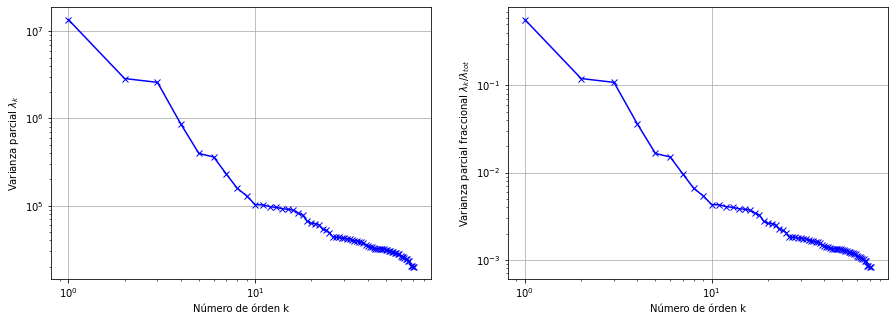

In [48]:
print('Tiempo =',str(datetime.now()))
l=ss.ScreeD(EEG,L)
print('Tiempo=',str(datetime.now()))
k=np.arange(len(l))
k=k+1
fig,axs = plt.subplots(1,2,figsize=(15,5))
axs[0].plot(k,l,'-x',color='blue')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlabel('Número de órden k')
axs[0].set_ylabel(r'Varianza parcial $\lambda_k$')
axs[0].grid()

axs[1].plot(k,l/sum(l),'-x',color='blue')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel('Número de órden k')
axs[1].set_ylabel(r'Varianza parcial fraccional $\lambda_k/\lambda_{tot}$')
axs[1].grid()
plt.show()

##### Matriz de correlación

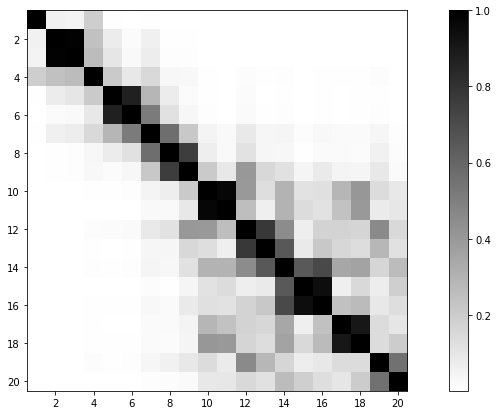

In [49]:
x=np.arange(1, 20, 2)
y=x+1
plt.figure(figsize=(15,7)) #Declaramos el espacio de figura para graficar
plt.imshow(wMatrix,cmap=plt.cm.binary);
plt.colorbar()
plt.xticks(x,y)
plt.yticks(x,y)
plt.show()

### Agrupamiento

Dada la ventana $L$ las componentes en los grupos generados PC y NP tendrán frecuencias de oscilación limitadas dentro del ancho un ancho de banda dado. Por lo tanto es posible utilizar la frecuencia pico de su representación espectral para clasificar las componentes en términos de su frecuencia tal que:

$$f_{max} = argmax_{f}[abs(\mathcal{F}\{PC\})]$$

donde $f_{max}$ es la frecuencia máxima, y $\mathcal{F}\{PC\}$ la transformada de Fourier de los componentes periodicos o no periódicos. Finalmente las componentes PC y NP, frecuencias pico en la misma banda se agrupan, que constituye la componente asociada a dicha banda de ritmo EEG.

In [162]:
'''Definimos la función que realizará la remoción de artefactos dado el umbral y agrupará las componentes'''
def A_EXTR(signal,glist,l_list,v0=200):
    s_max = signal.max()
    s_list = np.sqrt(l_list)
    # Remoción de artefactos
    if s_max < v0:
        g_cut = np.delete(glist,0,axis=0)
        s_cut = np.delete(s_list,0)
    else: 
        g_cut = np.delete(glist,[0,1],axis=0)
        s_cut = np.delete(s_list,[0,1])
    #Agrupamiento de las componentes
    PC = []
    NP = []
    for i in range(len(s_cut)):
        for k in range(len(s_cut)-1):
            aux_list = np.delete(s_cut,i)
            ratio = abs(1- (aux_list[k]/s_cut[i]))
        if ratio < 0.05:
            PC.append(g_cut[i])
        else:
            NP.append(g_cut[i])
    
    return np.array(PC),np.array(NP)

In [163]:
c_per,c_noper = A_EXTR(EEG,gklist,l)

In [164]:
c_per.shape

(4, 1500)

In [165]:
c_noper.shape

(66, 1500)

In [174]:
'''Definimos la función que encontrará la frecuencia máxima para cada grupo de componetes'''
def Fmax(PC,NP):
    PC_fft = sc.fft.fft(PC)
    NP_fft = sc.fft.fft(NP)
    
    PC_fmax = []
    NP_fmax = []
    for i in range(len(PC)):
        N = len(PC_fft[i])
        T = 1/500
        freq = sc.fft.fftfreq(N,T)[1:N//2]
        f_max = np.round(freq[np.argmax(abs(PC_fft[i][1:N//2]))],2)
        PC_fmax.append(f_max)
    for i in range(len(NP)):
        N = len(NP_fft[i])
        freq = sc.fft.fftfreq(N,1/500)[1:N//2]
        f_max = np.round(freq[np.argmax(abs(NP_fft[i][1:N//2]))],2)
        NP_fmax.append(f_max)
    PC_fmax_s, NP_fmax_s = np.array(sorted(PC_fmax)),np.array(sorted(NP_fmax))

    return np.array(PC_fmax),np.array(NP_fmax)

In [175]:
Fmax(c_per,c_noper)

(array([185.33, 185.33, 192.  , 192.  ]),
 array([  9.  ,   9.  ,   3.33,  16.  ,  17.33,  20.33,  26.33,  26.67,
         54.33,  54.33,  42.33,  42.33,  74.  ,  74.  ,  74.  ,  49.33,
         54.33,  35.67,  64.67,  64.67,  35.67, 149.  , 149.  ,  78.  ,
        237.  , 109.33, 106.33, 114.67, 114.67, 237.  ,  81.  ,  81.  ,
        102.  , 127.33, 249.67, 154.33, 154.33, 121.33,  98.67, 216.33,
        216.33,  95.33, 209.33, 209.33, 121.33, 177.  , 209.33, 209.33,
        177.  , 141.  , 141.  , 221.  , 245.33, 241.67, 167.67, 167.67,
        202.67, 202.67, 162.33, 162.33,  89.33,  89.33, 197.33, 197.33,
        134.67, 134.67]))

El resultado tras el agrupamiento y remoción de artefactos, son los vectores de la frecuencia máxima de las componentes correspondientes a las listas de componentes agrupadas, con esta información es posible agrupar las componentes manualmente por sus frecuencias similares. Por ejemplo, notamos que en el grupo de componentes periodicas, tenemos dos pares de dos elementos con la misma frecuencia que podrían agruparse entre sí.

### Resultados y Discusión

Con los resultados anteriores agruparemos las componentes de acuerdo a su frecuencia máxima

In [195]:
def GRP (PC,NP):
    cp_max,cnp_max = Fmax(PC,NP)
    '''Componentes Theta'''
    theta = []
    for i in range(4,8):
        for k in range(len(cp_max)):
            if int(cp_max[k]) == i:
                theta.append(PC[k])
        for j in range(len(cnp_max)):
            if int(cnp_max[j]) == i:
                theta.append(NP[j])
    '''Componentes alfa'''
    alfa = []
    for i in range(9,13):
        for k in range(len(cp_max)):
            if int(cp_max[k]) == i:
                alfa.append(PC[k])
        for j in range(len(cnp_max)):
            if int(cnp_max[j]) == i:
                alfa.append(NP[j])
    '''Componentes beta'''
    beta = []
    for i in range(14,31):
        for k in range(len(cp_max)):
            if int(cp_max[k]) == i:
                beta.append(PC[k])
        for j in range(len(cnp_max)):
            if int(cnp_max[j]) == i:
                beta.append(NP[j])
    '''Componentes gama'''
    gama = []
    for i in range(32,51):
        for k in range(len(cp_max)):
            if int(cp_max[k]) == i:
                gama.append(PC[k])
        for j in range(len(cnp_max)):
            if int(cnp_max[j]) == i:
                gama.append(NP[j])
    '''Componentes baja frecuencia'''
    bass=[]
    for i in range(0,3):
        for k in range(len(cp_max)):
            if int(cp_max[k]) == i:
                bass.append(PC[k])
        for j in range(len(cnp_max)):
            if int(cnp_max[j]) == i:
                bass.append(NP[j])
    '''Componentes de alta frecuencia'''
    treble = []
    limit = int(max(cp_max.max(),cnp_max.max()))+1
    for i in range(52,limit):
        for k in range(len(cp_max)):
            if int(cp_max[k]) == i:
                treble.append(PC[k])
        for j in range(len(cnp_max)):
            if int(cnp_max[j]) == i:
                treble.append(NP[j])
    return theta,alfa,beta,gama,bass,treble

In [197]:
theta,alfa,beta,gama,low_f,high_f = GRP(c_per,c_noper)

In [219]:
theta #Notamos como no obtenemos componentes en el ritmo theta

[]

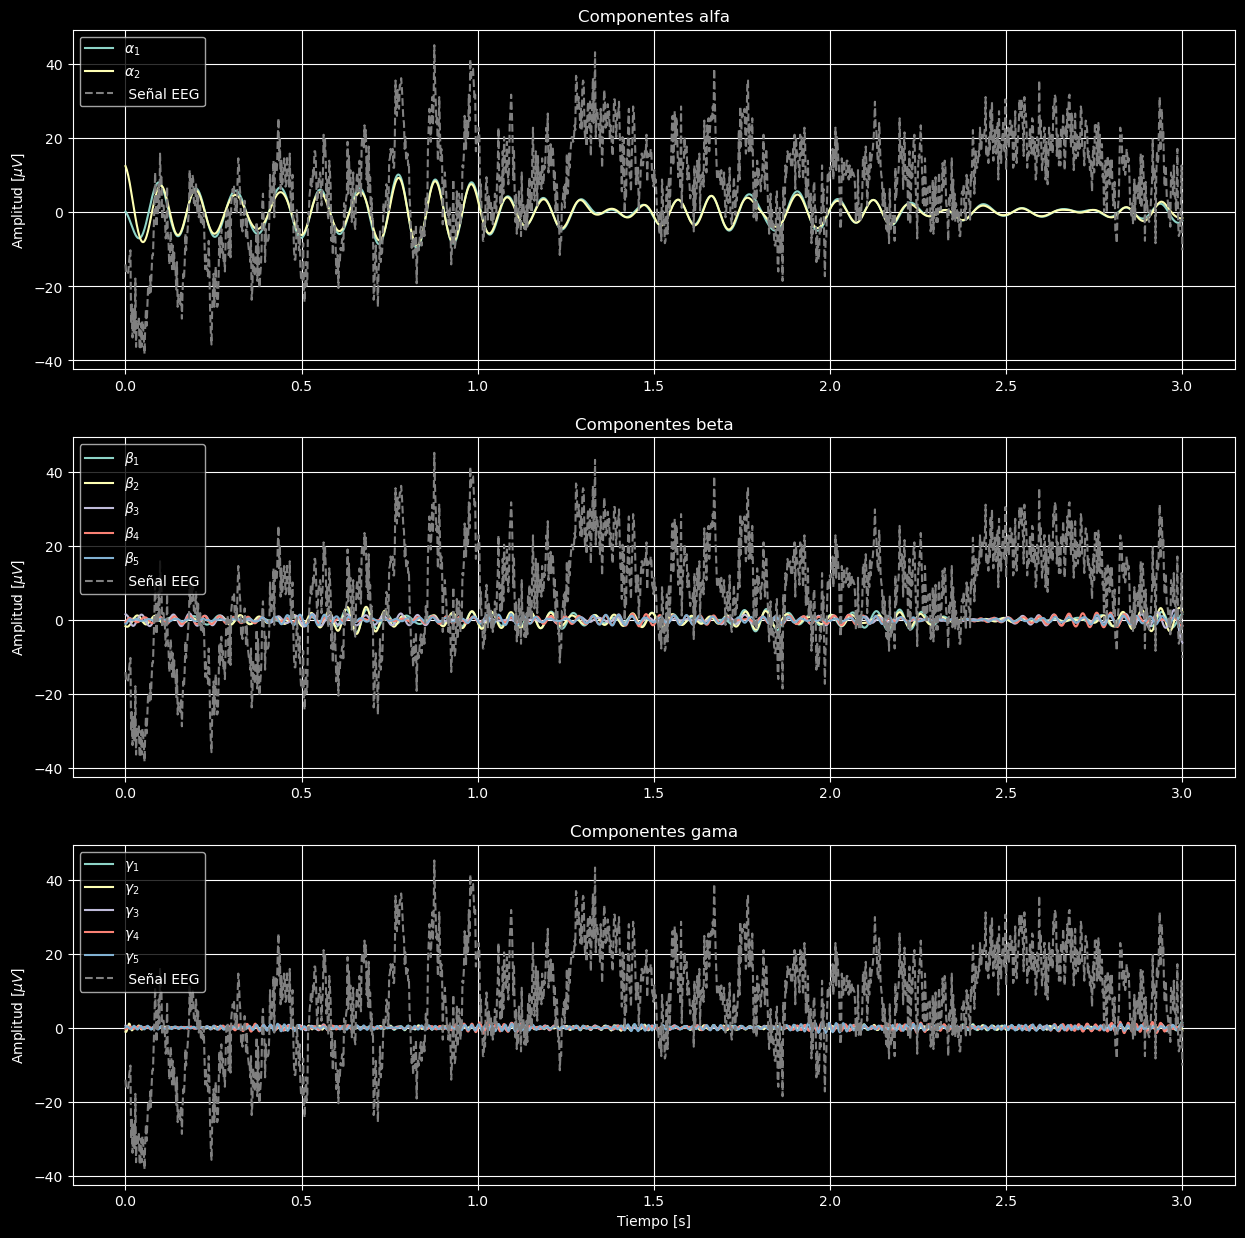

In [227]:
plt.style.use('dark_background')
fig,ax  = plt.subplots(3,1,figsize=(15,15))
time = np.linspace(0,3,1500)
for i in range(len(alfa)):
    ax[0].plot(time,alfa[i],label = r'$\alpha_{:2d}$'.format(i+1))
ax[0].plot(time,EEG,'--',c='grey' , label = ' Señal EEG')
ax[0].set_title('Componentes alfa')
ax[0].set_ylabel(f'Amplitud [$\mu V$]')
ax[0].legend()
ax[0].grid()

for i in range(len(beta)):
    ax[1].plot(time,beta[i],label = r'$\beta_{:2d}$'.format(i+1))
ax[1].plot(time,EEG,'--',c='grey' ,label = ' Señal EEG')
ax[1].set_title('Componentes beta')
ax[1].set_ylabel(f'Amplitud [$\mu V$]')
ax[1].legend()
ax[1].grid()

for i in range(len(gama)):
    ax[2].plot(time,gama[i],label = r'$\gamma_{:2d}$'.format(i+1))
ax[2].plot(time,EEG,'--',c='grey' , label = ' Señal EEG')
ax[2].set_title('Componentes gama')
ax[2].set_ylabel(f'Amplitud [$\mu V$]')
ax[2].set_xlabel('Tiempo [s]')
ax[2].legend()
ax[2].grid()

plt.show()
plt.style.use('default')

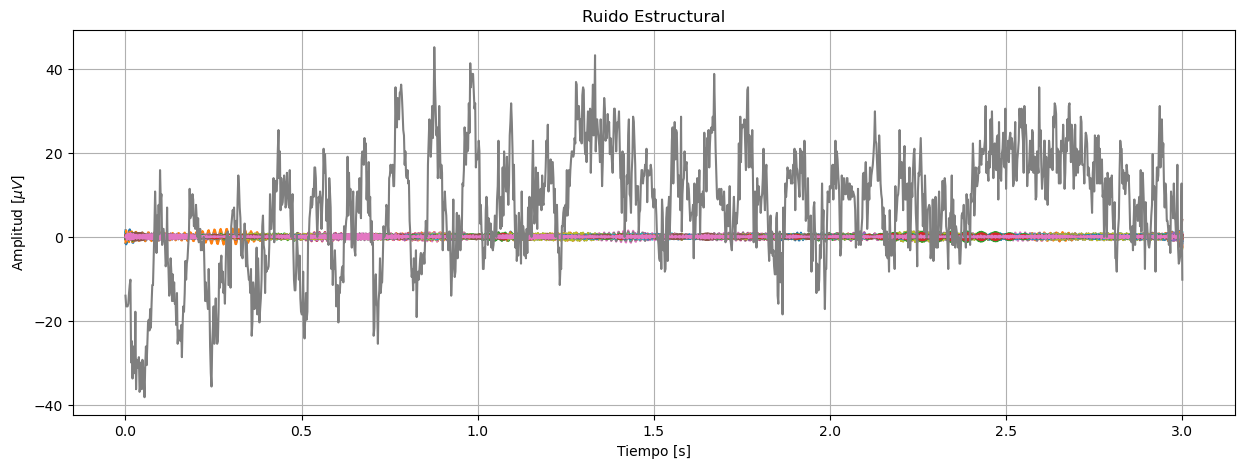

In [228]:
fig, ax = plt.subplots(1,figsize=(15,5))
for i in range(len(high_f)):
    ax.plot(time,high_f[i])
ax.plot(time,EEG)
ax.grid()
ax.set_title('Ruido Estructural')
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel(f'Amplitud [$\mu V$]')
plt.show()

Finalmente, se muestra la extracción de ritmos de la señal de EEG con sus respectivas componentes previamente agrupadas las cuales muestran amplitud variable y no cuentan con alteraciones por artefactos. Como era esperado, las componentes de ritmo alfa dominan en amplitud sobre los demás ritmos, de acuerdo con el experimento de Berger para la visualización de ondas alfa en lóbulo occipital durante un estado de reposo. Adicionalmente se muestran las componentes de frecuencia superior a 50 [Hz] las cuales pueden ser interpretadas como ruido estructural debido a su baja amplitud y alta frecuencia. 

### Referencias

    1. Hu, H., Guo, S., Liu, R., & Wang, P. (2017). An adaptive singular spectrum analysis method for extracting brain rhythms of electroencephalography. PeerJ, 5, e3474.
    
    2. He, P., Wilson, G., & Russell, C. (2004). Removal of ocular artifacts from electro-encephalogram by adaptive filtering. Medical and biological engineering and computing, 42(3), 407-412.
    
    3. He, P., Wilson, G., & Russell, C. (2004). Removal of ocular artifacts from electro-encephalogram by adaptive filtering. Medical and biological engineering and computing, 42(3), 407-412
    
    4. Wallstrom, G. L., Kass, R. E., Miller, A., Cohn, J. F., & Fox, N. A. (2004). Automatic correction of ocular artifacts in the EEG: a comparison of regression-based and component-based methods. International journal of psychophysiology, 53(2), 105-119.
    
    5. Azami, H., & Sanei, S. (2014). Spike detection approaches for noisy neuronal data: assessment and comparison. Neurocomputing, 133, 491-506.
    
    6. Akar, S. A., Kara, S., Latifoğlu, F., & Bilgic, V. (2015). Investigation of the noise effect on fractal dimension of EEG in schizophrenia patients using wavelet and SSA-based approaches. Biomedical Signal Processing and Control, 18, 42-48.
    
    7. Mohammadi, S. M., Kouchaki, S., Ghavami, M., & Sanei, S. (2016). Improving time–frequency domain sleep EEG classification via singular spectrum analysis. Journal of neuroscience methods, 273, 96-106.
    
    8.
    
    9. Cole, S. R., & Voytek, B. (2017). Brain oscillations and the importance of waveform shape. Trends in cognitive sciences, 21(2), 137-149.
    
    8. James, C. J., & Lowe, D. (2003). Extracting multisource brain activity from a single electromagnetic channel. Artificial Intelligence in Medicine, 28(1), 89-104.
    
    9. Ng, K. A., & Chan, P. K. (2005). A CMOS analog front-end IC for portable EEG/ECG monitoring applications. IEEE Transactions on Circuits and Systems I: Regular Papers, 52(11), 2335-2347.